In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neurolib.optimal_control import cost_functions

%load_ext autoreload
%autoreload 2

In [38]:
duration = 200.
period = 4.

def gettime(dur, dt):
    return np.arange(0, dur+dt, dt)

def getfunc(time, p, factor):
    res = np.zeros((time.shape))
    for factor_dp in [0.8, 0.9, 1., 1.1, 1.2]:
        res += factor * np.sin(2.*np.pi*time / (factor_dp * p))
    res = res[np.newaxis, np.newaxis, :]
    return res

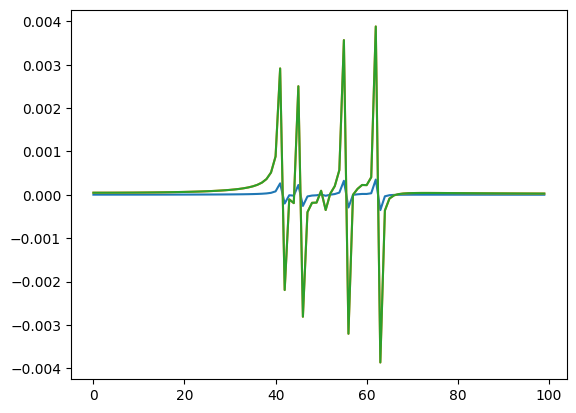

In [49]:
plt.plot(ffts[3]- ffts[2])
plt.plot(ffts[3]- ffts[1])
plt.plot(ffts[3]- ffts[1])

plt.show()

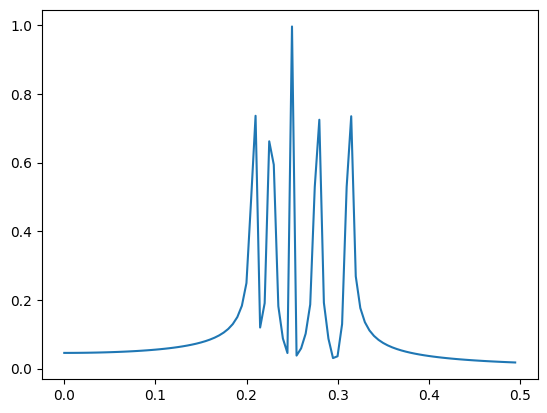

-9.716230433318616
integral =  12.364535664704954


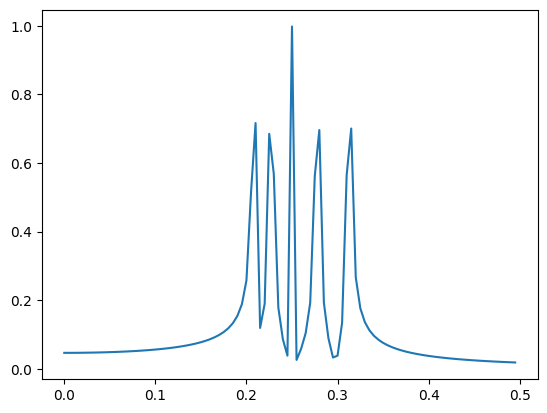

-9.748628625343041
integral =  12.43261706989577


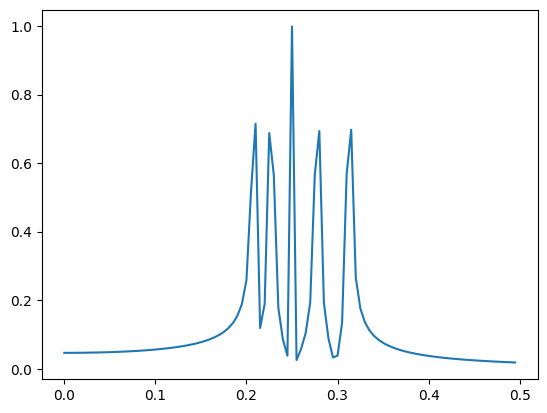

-9.752257011783055
integral =  12.439068165735018


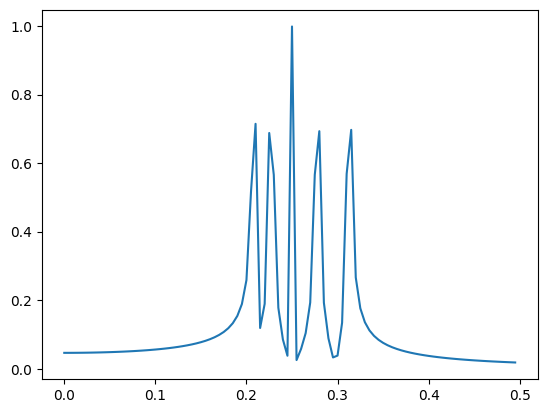

-9.7526270863876
integral =  12.439713055983816


In [48]:
ffts = []

for dt in [1e-1, 1e-2, 1e-3, 1e-4]:
    time = gettime(duration, dt)
    func = getfunc(time, period, 1.)

    #plt.plot(time, func[0,0,:])
    #plt.show()

    sr = 1.0 / dt 
    target_f = 1.0 / period
    fft_data_scaled, freqs = cost_functions.compute_fft(func[0, 0, 0:len(time)])

    plt.plot(freqs[:100]*sr, fft_data_scaled[:100])
    plt.show()

    ffts.append(fft_data_scaled[:100])
    integral = np.sum(fft_data_scaled[:100])
    cost = cost_functions.fourier_cost(func, dt, period, np.ones((1,1)), (0, len(time)), f_tol=1e-1)
    print(cost[0,0])
    print("integral = ", integral)

#plt.show()

In [ ]:
-8.576833491190055
integral =  10.165947640963285
-9.716230433318614
integral =  13.78254990716349
-9.748628625343038
integral =  14.674425509186603
-9.752257011783056
integral =  15.382570496075271
-9.752627086387598
integral =  16.065619120646385